In [1]:
from functools import partial

import pandas as pd

from lib import pipe, rename, set_index, add_suffix, merge_dfs

In [2]:
columns = ("Auckland",
           "Franklin District",
           "Manukau",
           "North Shore",
           "Papakura District",
           "Rodney District",
           "Waitakere",
           "National",
           "Date.Lodged",)
index_column = "Date.Lodged"
column_names = {"Auckland": "Auckland City District",
                "Manukau": "Manukau City District",
                "North Shore": "North Shore City District",
                "Waitakere": "Waitakere City District",
                "National": "Nationwide",
                "Date.Lodged": "Date Lodged"}
years = 15  # last 15 years

In [3]:
# mean values
mean = pipe(
    partial(pd.read_csv, usecols=columns),
    partial(rename, columns=column_names),
    partial(set_index, column="Date Lodged", to_datetime=True)
)("data/mean-rents-by-ta.csv").tail(12 * years)

In [4]:
mean.head()

,Nationwide,Auckland City District,Franklin District,Manukau City District,North Shore City District,Papakura District,Rodney District,Waitakere City District
Date Lodged,,,,,,,,
2000-04-01,207.671578,294.497411,214.870690,251.102041,275.149550,231.021505,232.810526,241.182927
2000-05-01,208.798378,285.965130,208.555556,252.791563,274.260840,234.896450,226.847162,245.826347
2000-06-01,207.434588,289.791031,209.840226,249.152995,262.652471,239.107143,220.444142,240.297571
2000-07-01,210.390058,286.408584,202.250000,254.851641,277.566711,243.701493,216.527374,240.334148
2000-08-01,208.114891,285.272597,201.504065,254.483283,268.220361,228.031250,231.086957,242.895964


In [5]:
mean.tail()

,Nationwide,Auckland City District,Franklin District,Manukau City District,North Shore City District,Papakura District,Rodney District,Waitakere City District
Date Lodged,,,,,,,,
2014-11-01,374.903454,484.598252,401.220930,452.958384,501.807629,429.539877,462.780702,434.366864
2014-12-01,386.049785,493.753521,385.815217,466.602681,525.930192,401.283784,462.438389,441.346705
2015-01-01,388.815115,490.457052,397.755102,461.152941,520.317169,408.548387,443.041875,434.461818
2015-02-01,398.165739,503.689863,417.825688,471.881647,517.006033,417.832569,452.973684,447.992647
2015-03-01,396.398298,495.608908,416.563669,466.580000,528.187654,439.708075,481.497696,440.760250


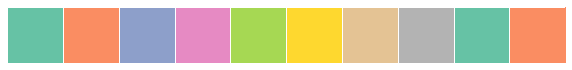

In [6]:
%matplotlib inline
import seaborn as sns
sns.palplot(sns.color_palette("Set2", 10))

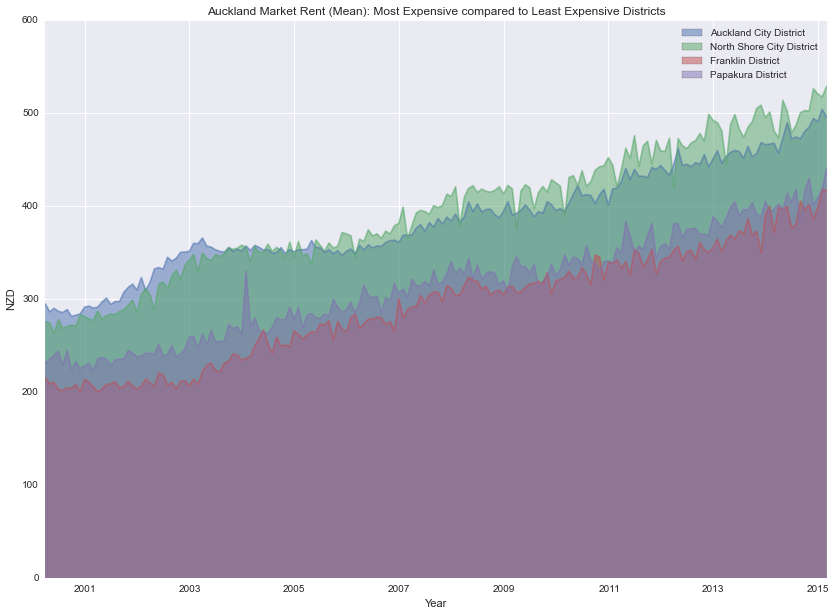

In [7]:
# Market Rent: Most Expensive compared to Least Expensive Districts (Mean)
p = mean[[
    "Auckland City District",
    "North Shore City District",
    "Franklin District",
    "Papakura District"
]].plot(
    figsize=(14, 10),
    kind="area",
    stacked=False,
    title="Auckland Market Rent (Mean): Most Expensive compared to Least Expensive Districts"
)
p.set_xlabel("Year")
p.set_ylabel("NZD")

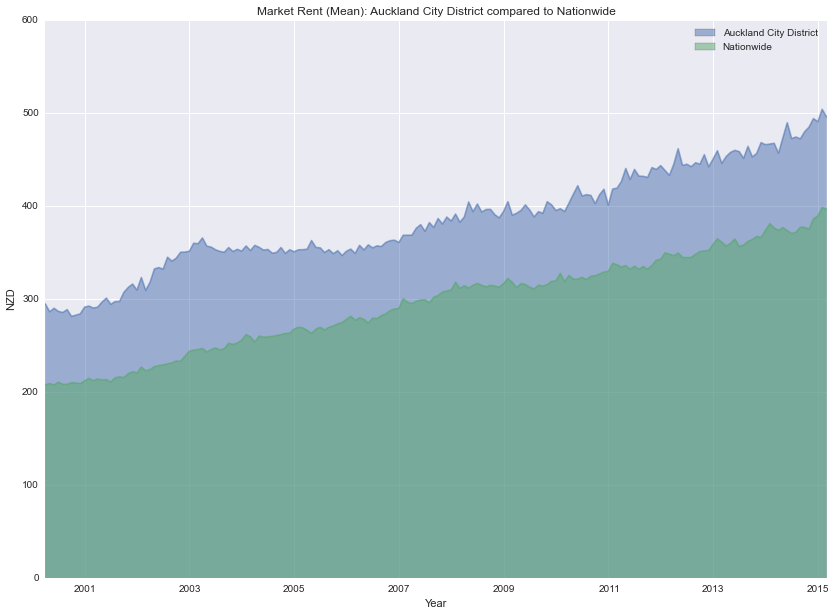

In [8]:
# Market Rent: Auckland City District compared to Nationwide (Mean)
p = mean[[
    "Auckland City District",
    "Nationwide"
]].plot(
    figsize=(14, 10),
    kind="area",
    stacked=False,
    title="Market Rent (Mean): Auckland City District compared to Nationwide"
)
p.set_xlabel("Year")
p.set_ylabel("NZD")

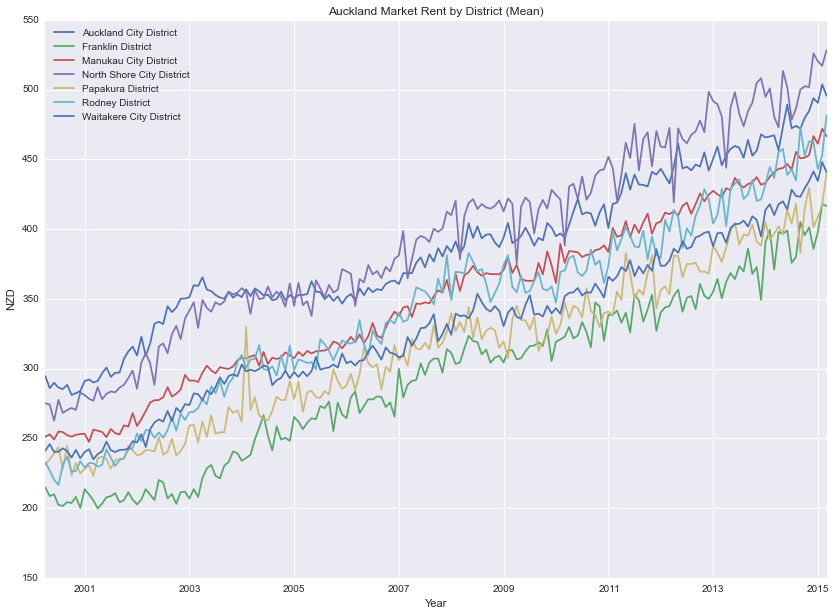

In [9]:
# Auckland Market Rent by District (Mean)
p = mean[[
    "Auckland City District",
    "Franklin District",
    "Manukau City District",
    "North Shore City District",
    "Papakura District",
    "Rodney District",
    "Waitakere City District"
]].plot(
    figsize=(14, 10),
    kind="line",
    title="Auckland Market Rent by District (Mean)"
)
p.set_xlabel("Year")
p.set_ylabel("NZD")

In [10]:
# lower-quartile values
lq = pipe(
    partial(pd.read_csv, usecols=columns),
    partial(rename, columns=add_suffix(column_names, "(LQ)")),
    partial(set_index, column="Date Lodged (LQ)", to_datetime=True)
)("data/synthetic-lower-quartile-rents-by-ta.csv").tail(12 * years)

# upper-quartile values
uq = pipe(
    partial(pd.read_csv, usecols=columns),
    partial(rename, columns=add_suffix(column_names, "(UQ)")),
    partial(set_index, column="Date Lodged (UQ)", to_datetime=True)
)("data/synthetic-upper-quartile-rents-by-ta.csv").tail(12 * years)

# merge data frames together
merged = merge_dfs(mean, lq, uq)

In [11]:
# auckland city district (mean/lower-quartile/upper-quartile)
acd = rename(merged[["Auckland City District",
                     "Auckland City District (LQ)",
                     "Auckland City District (UQ)"]],
             columns={"Auckland City District": "Mean",
                      "Auckland City District (LQ)": "Lower-Quartile",
                      "Auckland City District (UQ)": "Upper-Quartile"})

In [12]:
acd.head()

,Mean,Lower-Quartile,Upper-Quartile
Date Lodged,,,
2000-04-01,294.497411,210.920462,352.717356
2000-05-01,285.965130,200.017872,346.109431
2000-06-01,289.791031,206.210065,347.810174
2000-07-01,286.408584,207.277633,342.586537
2000-08-01,285.272597,206.348247,340.543738


In [13]:
acd.tail()

,Mean,Lower-Quartile,Upper-Quartile
Date Lodged,,,
2014-11-01,484.598252,342.057703,585.413665
2014-12-01,493.753521,340.094415,602.921669
2015-01-01,490.457052,342.415712,595.758057
2015-02-01,503.689863,351.675482,611.262343
2015-03-01,495.608908,333.021827,608.877352


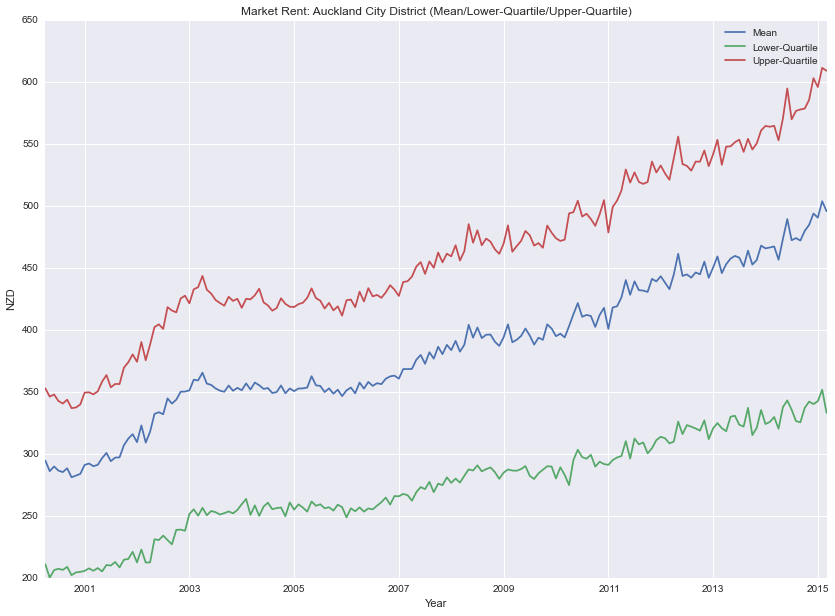

In [14]:
# Market Rent: Auckland City District (Mean/Lower-Quartile/Upper-Quartile)
p = acd.plot(
    figsize=(14, 10),
    kind="line",
    title="Market Rent: Auckland City District (Mean/Lower-Quartile/Upper-Quartile)"
)
p.set_xlabel("Year")
p.set_ylabel("NZD")